In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%cd ../
from src.data.datasets import HandwritingDataset
%cd notebooks/

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/nazar/Projects/ukrainian_handwriting
/home/nazar/Projects/ukrainian_handwriting/notebooks


# Small EDA and some visualizations

In [2]:
orig_dataset = HandwritingDataset('../data/processed/final.csv')

In [3]:
df = orig_dataset.df

In [4]:
df.head()

,label,lbl_code,is_uppercase,filename
0,0,0,False,glyphs/0-0.png
1,0,0,False,glyphs/0-1.png
2,0,0,False,glyphs/0-2.png
3,0,0,False,glyphs/0-3.png
4,0,0,False,glyphs/0-4.png


In [5]:
print(f'Data contains {df.shape[0]} samples')
print(f'Data contains {len(df.label.unique())} classes')

Data contains 1581 samples
Data contains 43 classes


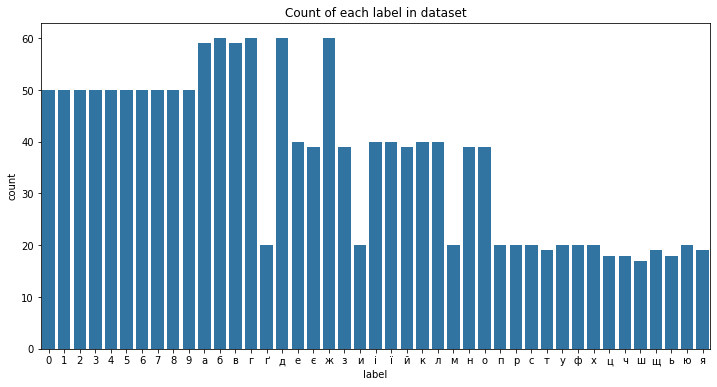

In [6]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=df.label, color='tab:blue').set(title='Count of each label in dataset');

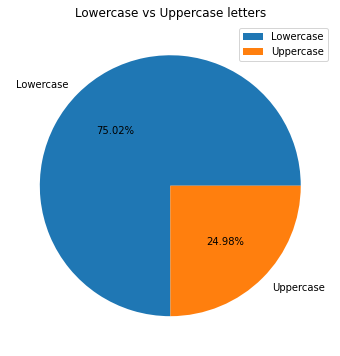

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(df.is_uppercase.value_counts(), labels=('Lowercase', 'Uppercase'), autopct='%.2f%%')
plt.title('Lowercase vs Uppercase letters')
plt.legend();

In [5]:
def visualize_samples(dataset, indices=None, title=None, count=10):
    plt.figure(figsize=(count*2, 3))
    if not indices:
        indices = np.random.choice(np.arange(len(dataset)), count, replace=False)
    else:
        indices = indices[:count]
    if not title:
        title = f'{count} random samples from dataset'
    plt.suptitle(title, fontsize=16)
    for i, idx in enumerate(indices):
        img, lbl_code, label = dataset[idx]
        plt.subplot(1, count, i + 1)
        plt.title(f'Label: {label} | {lbl_code}')
        plt.imshow(img)
        plt.grid(False)
        plt.axis('off')

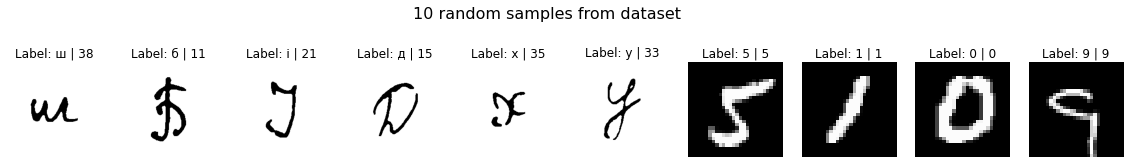

In [9]:
visualize_samples(orig_dataset);